In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
#LabelEncoder is used to convert categorical data to numerical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import kagglehub
# We may use Decision Tree or XGBoost for better results
# from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization



In [4]:
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")
print(path)
data = pd.read_csv(path + '/mnist_train.csv')
data.head()

C:\Users\vpthi\.cache\kagglehub\datasets\oddrationale\mnist-in-csv\versions\2


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Alright, so how are we going to approach this problem?
# 1. Data Preprocessing
X = data.drop('label', axis=1) #Or, you can use X = data[Categorical_features]
y = data['label']
# 2. Split the data and scale it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Do we need to encode the target variable? No, because it's already in numerical format (0-9) 
# But if it were categorical, we would use LabelEncoder, like for instance in the Breast Cancer or Bank Marketing datasets
# Such as this: 0 = 'No', 1 = 'Yes' or 0 = 'Malignant', 1 = 'Benign'
# Or, say we had labels like 'cat', 'dog', 'mouse' - we would need to encode them to 0, 1, 2 respectively
# le = LabelEncoder()
# y_train_enc = le.fit_transform(y_train)
# y_test_enc = le.transform(y_test)


Accuracy: 91.45%


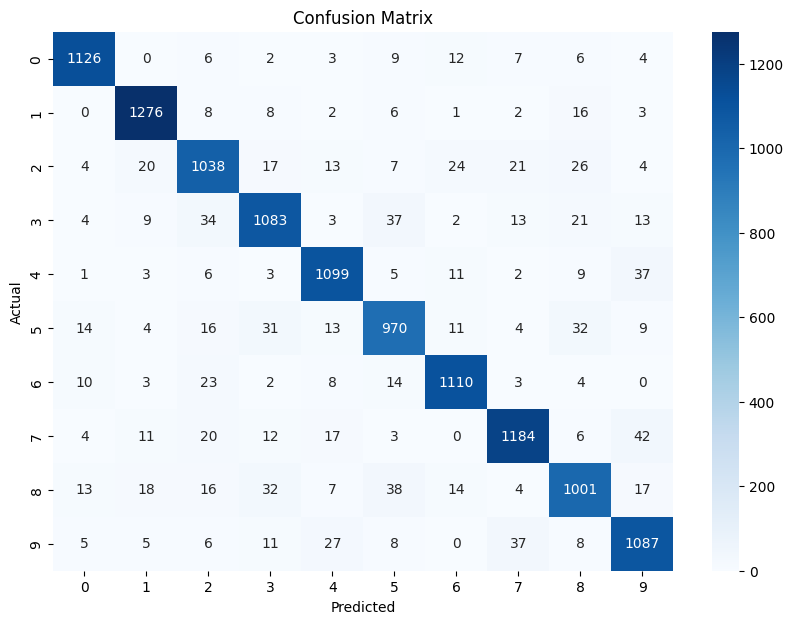

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.88      0.88      0.88      1174
           3       0.90      0.89      0.90      1219
           4       0.92      0.93      0.93      1176
           5       0.88      0.88      0.88      1104
           6       0.94      0.94      0.94      1177
           7       0.93      0.91      0.92      1299
           8       0.89      0.86      0.87      1160
           9       0.89      0.91      0.90      1194

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



In [ ]:
# Now, since we're going to identify MNIST digits, we can use Logistic Regression, Decision Tree, Random Forest, XGBoost, or even Neural Networks
# Let's start with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)
# 91%? Not bad for a simple model!
# So, let's rehearse on everything about Logistic Regression.
# So, Logistic Regression is a statistical method for predicting binary classes.
# The outcome or target variable is binary in nature. It is used to estimate the probability of a binary response based on one or more predictor variables (features).
# The probability is mapped to a binary outcome using a logistic function.
# The logistic function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1.
# The formula for the logistic function is:
# p = 1 / (1 + e^-(b0 + b1*x1 + b2*x2 + ... + bn*xn))
# where:
# p is the predicted probability of the positive class (e.g., '1' or 'Yes')
# e is the base of the natural logarithm (approximately equal to 2.71828
# b0 is the intercept (constant term)
# b1, b2, ..., bn are the coefficients for the predictor variables x1, x2, ..., xn
# The coefficients are estimated using Maximum Likelihood Estimation (MLE), which finds the values that maximize the likelihood of observing the given data.
# Logistic Regression can be extended to multiclass classification problems using techniques like One-vs-Rest (OvR) or Multinomial Logistic Regression.
# And, the gradient descent algorithm is also like Linear Regression, used to minimize the cost function.
# Cost function formula:
# J(b) = -1/m * Σ [y*log(p) + (1-y)*log(1-p)]
# where:
# J(b) is the cost function
# m is the number of training examples
# y is the actual label (0 or 1)
# p is the predicted probability of the positive class
# Σ denotes the summation over all training examples
# The goal of training is to find the coefficients (b0, b1, ..., bn) that minimize the cost function J(b).

#Evaluation, Confusion Matrix, Classification Report
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
# Precision: TP / (TP + FP)
# Recall: TP / (TP + FN)
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
# Where:
# TP = True Positives
#   TN = True Negatives
#   FP = False Positives
#   FN = False Negatives

# Anyways, moving onto the next model, Decision Tree Classifier


In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 85.72%


In [11]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 94.58%


In [12]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:30:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 97.70%


In [13]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
# Neural Networks are a series of algorithms that attempt to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.
# In this case, we used a feedforward neural network with three hidden layers.
# Each layer consists of neurons (or nodes) that are connected to the neurons in the previous and next layers.
# The input layer has 784 neurons (one for each pixel in the 28x28 image), and the output layer has 10 neurons (one for each digit from 0 to 9).
# The activation function used in the hidden layers is ReLU (Rectified Linear Unit), which introduces non-linearity to the model.
# The output layer uses the softmax activation function, which is suitable for multi-class classification problems.
# We also used Batch Normalization to normalize the inputs of each layer, which helps in faster convergence and stability during training.
# Dropout is a regularization technique that randomly sets a fraction of input units to 0 at each update during training time, which helps prevent overfitting.
# The model is compiled using the Adam optimizer and sparse categorical crossentropy loss function, which is appropriate for multi-class classification with integer labels.


c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8926 - loss: 0.3477 - val_accuracy: 0.9575 - val_loss: 0.1514
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9445 - loss: 0.1827 - val_accuracy: 0.9613 - val_loss: 0.1419
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9543 - loss: 0.1462 - val_accuracy: 0.9678 - val_loss: 0.1305
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9641 - loss: 0.1163 - val_accuracy: 0.9664 - val_loss: 0.1392
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9673 - loss: 0.1043 - val_accuracy: 0.9659 - val_loss: 0.1508
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9699 - loss: 0.0941 - val_accuracy: 0.9698 - val_loss: 0.1481
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9746 - loss: 0.0821 - val_accuracy: 0.9721 - val_loss: 0.1262
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9773 - loss: 0.0704